# Visualización de datos con Python y la librería Seaborn

## Gráficos de línea

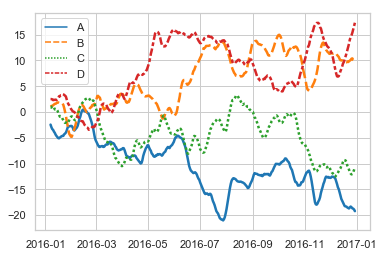

In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style="whitegrid")

rs = np.random.RandomState(365)
values = rs.randn(365, 4).cumsum(axis=0)
dates = pd.date_range("1 1 2016", periods=365, freq="D")
data = pd.DataFrame(values, dates, columns=["A", "B", "C", "D"])
data = data.rolling(7).mean()

sns.lineplot(data=data, palette="tab10", linewidth=2.5)

## Gráficos de barra

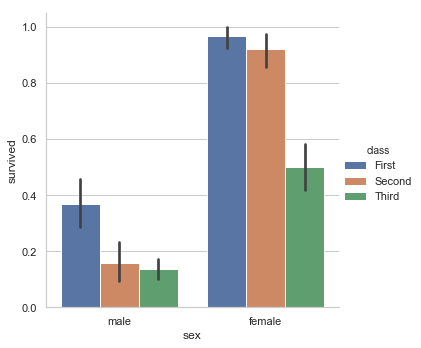

In [27]:
titanic = sns.load_dataset("titanic")
sns.catplot(x="sex", y="survived", hue="class", kind="bar", data=titanic);

## El Cuarteto de Anscombe como ejemplo de visualización de regresión lineal

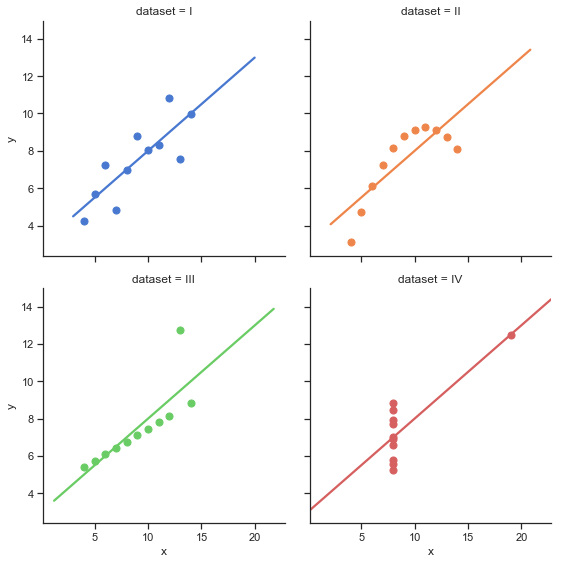

In [29]:
sns.set(style="ticks")
df = sns.load_dataset("anscombe")
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=df, col_wrap=2, ci=None, palette="muted", height=4, scatter_kws={"s":50, "alpha":1})

## Múltiples regresiones lineales

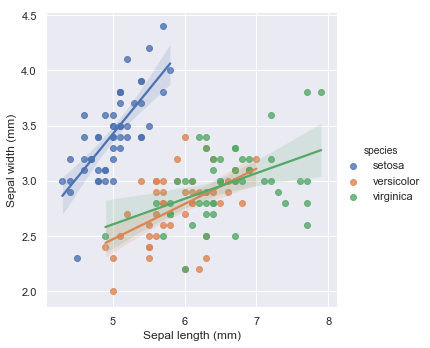

In [35]:
sns.set()

# Cargamos el dataset
iris = sns.load_dataset("iris")

# Graficamos sepal_width en funcion de sepal_length y damos un color diferente a cada especie, para poder compararlas
g = sns.lmplot(x="sepal_length", y="sepal_width", hue="species",
               truncate=True, height=5, data=iris)

# Rotulamos adecuadamente los ejes
g.set_axis_labels("Sepal length (mm)", "Sepal width (mm)")

Si quisiéramos comparar todos los pares de variables utilizaríamos el siguiente gráfico

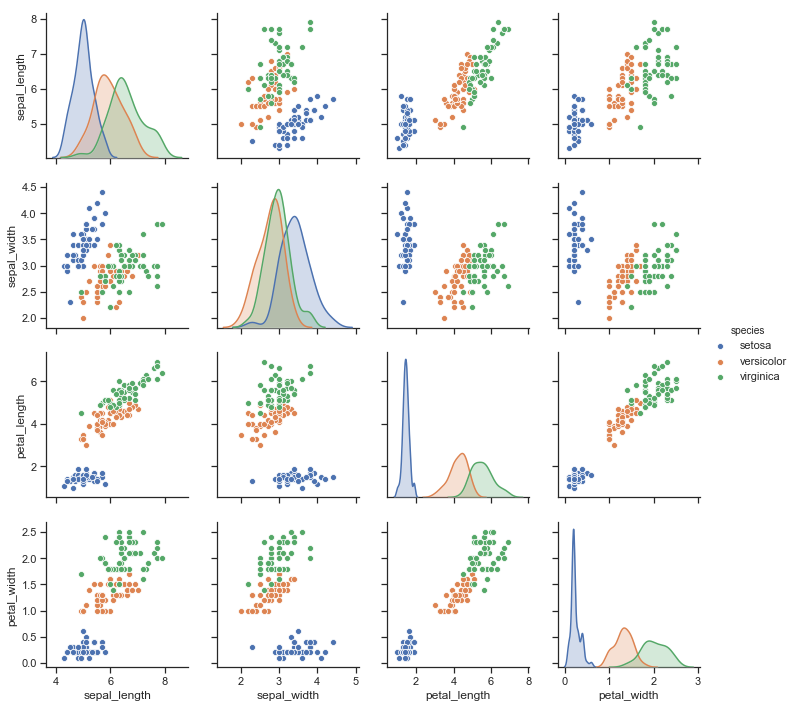

In [32]:
sns.set(style="ticks")

df = sns.load_dataset("iris")
sns.pairplot(df, hue="species")

Si nos interesa agregar las distribuciones marginales al gráfico de regresión se puede hacer de la siguiente manera:

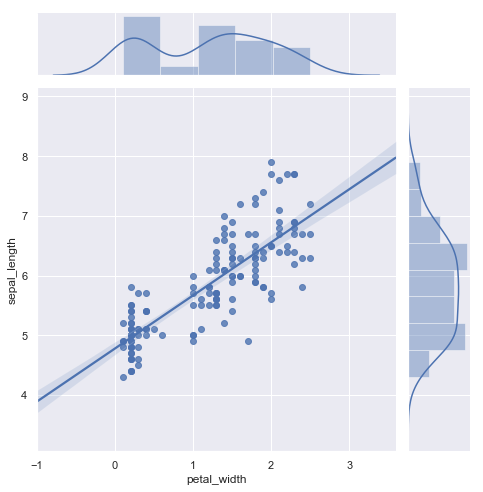

In [39]:
sns.set(style="darkgrid")

tips = sns.load_dataset("iris")
g = sns.jointplot("petal_width", "sepal_length", data=tips, kind="reg",
                   color="b", height=7)

## Faceting

In [37]:
sns.set(style="whitegrid")

# para que las figuras aparezcan en el notebook
%matplotlib inline

# cargamos el dataset titanic
dataset = sns.load_dataset('titanic')

dataset.head()  

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


Por ejemplo si quisieramos comparar las distribuciones de edades de los pasajeros que sobrevivieron frente a los que no a la vez distinguiendo entre hombres y mujeres

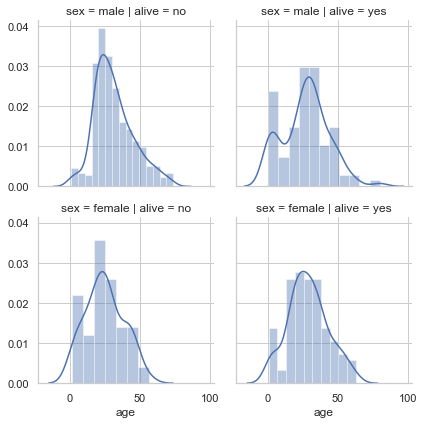

In [38]:
grid = sns.FacetGrid(data=dataset, col='alive', row='sex')  
grid.map(sns.distplot, 'age')  

## Heatmap

Si en cambio nos interesa evaluar la correlación entre las distintas variables dentro del dataset podemos calcularla y graficarla utilizando un heatmap

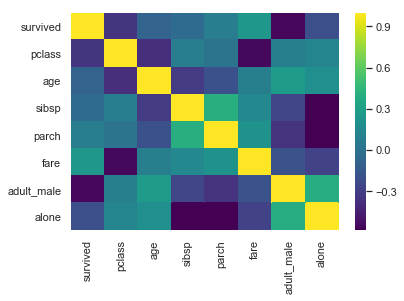

In [41]:
dataset.corr()  

corr = dataset.corr()  
sns.heatmap(corr, cmap='viridis')  

 ## Boxplots

In [42]:
import seaborn as sns
sns.set(style="ticks", palette="pastel")

# Load the example tips dataset
tips = sns.load_dataset("tips")

tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


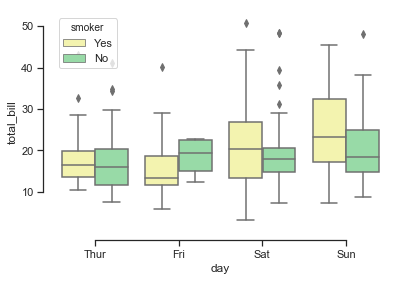

In [43]:
# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="day", y="total_bill",
            hue="smoker", palette=["y", "g"],
            data=tips)
sns.despine(offset=10, trim=True)